# Урок 2. Практическое задание

### Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

In [703]:
import numpy as np
import matplotlib.pyplot as plt

In [704]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [705]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [706]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [707]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

In [708]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [709]:
X_st[2] = calc_std_fit(X[2])

In [710]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [711]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [712]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

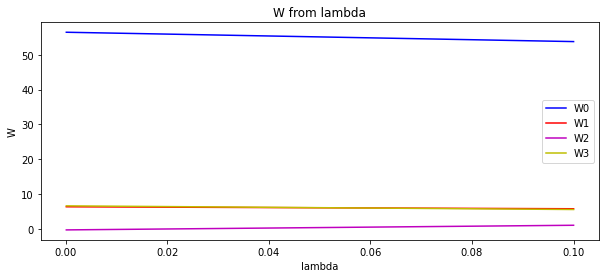

In [713]:
lambda_set = [0.1, 0.001, 1e-4]
W0 = []
W1 = []
W2 = []
W3 = []

for i in lambda_set:
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=i)
    W0.append(W[0])
    W1.append(W[1])
    W2.append(W[2])
    W3.append(W[3])
plt.figure(figsize=(10, 4))
plt.title('W from lambda')    
plt.plot(lambda_set, W0, color='b', label='W0')
plt.plot(lambda_set, W1, color='r', label='W1')
plt.plot(lambda_set, W2, color='m', label='W2')
plt.plot(lambda_set, W3, color='y', label='W3')
plt.xlabel('lambda')
plt.ylabel('W')
plt.legend()

### Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

#### Думаю, что можно, но смысла в этом нет. Так как любые данные после нормализации будут масштабируемы так, чтобы каждое значение падало в диапазон от 0 до 1

### Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [714]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ / 2 * (W / np.abs(W))) 
#        if i % (iterations / 10) == 0:
#            print(i, W, err)
    return W

In [715]:
W = eval_model_reg1(X_st, y, iterations=2000, alpha=1e-2, lambda_=1e-8)
W

array([56.5       ,  6.28995896, -0.29305336,  6.51921428])